In [89]:
import pandas as pd
import numpy as np
from keras import models
from keras import layers
from keras.utils import to_categorical

cardboard_f = pd.read_excel("cardboard.xlsx", header=None)
cardboard_f = cardboard_f.to_numpy()

In [90]:
np.random.shuffle(cardboard_f)

In [91]:
cardboard_f

array([[3.93e+02, 3.45e-01, 3.55e+01, ..., 3.27e+00, 2.00e+01, 0.00e+00],
       [2.92e+02, 2.88e-01, 3.38e+01, ..., 3.68e+00, 2.10e+01, 1.00e+00],
       [4.26e+02, 2.76e-01, 4.19e+01, ..., 4.48e+00, 1.10e+01, 0.00e+00],
       ...,
       [2.01e+02, 2.80e-01, 2.93e+01, ..., 3.32e+00, 1.10e+01, 0.00e+00],
       [1.91e+02, 2.57e-01, 3.01e+01, ..., 3.57e+00, 1.20e+01, 1.00e+00],
       [4.05e+02, 2.93e-01, 3.91e+01, ..., 3.99e+00, 1.40e+01, 0.00e+00]])

In [79]:
cardboard_f.shape

(1800, 11)

In [80]:
cardboard_f_train = cardboard_f[:900,:10]
cardboard_f_test = cardboard_f[900:,:10]

train_labels = cardboard_f[:900,10]
test_labels = cardboard_f[900:,10]

In [39]:
len(train_labels)
train_labels = train_labels.astype(int)

In [81]:
len(test_labels)
test_labels = test_labels.astype(int)

In [41]:
train_labels = to_categorical(train_labels)
train_labels.shape

(900, 2)

In [42]:
network = models.Sequential()
network.add(layers.Dense(90, activation='relu', input_shape=(10,)))
network.add(layers.Dense(60, activation='relu', input_shape=(10,)))
network.add(layers.Dense(2, activation='softmax'))

In [43]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [44]:
x_val = cardboard_f_train[:450]
partial_x_train = cardboard_f_train[450:]

y_val = train_labels[:450]
partial_y_train = train_labels[450:]

In [70]:
history = network.fit(partial_x_train,
                    partial_y_train,
                    epochs=7,
                    batch_size=128,
                    validation_data=(x_val, y_val),
                    verbose=0)

In [71]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

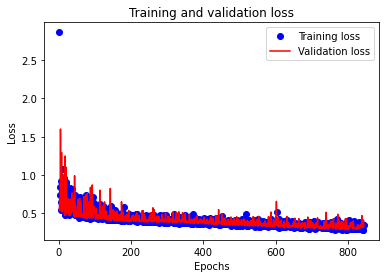

In [14]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

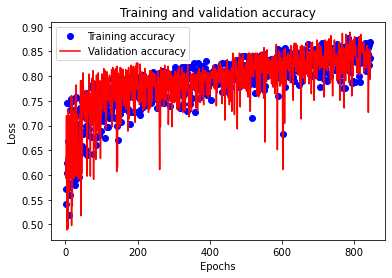

In [15]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [72]:
prediction_vector=network.predict(cardboard_f_test)
prediction_dataFrame=pd.DataFrame(prediction_vector)

In [73]:
type_zero_count = 0
type_one_count = 0

guesses = np.ones(len(prediction_vector))

for j in range (len(prediction_vector)):
    if prediction_vector[j,0] > prediction_vector[j,1]:
        type_zero_count += 1
        guesses[j] = 0
    else:
        type_one_count += 1
        guesses[j] = 1
        
print("-------------------------------------------------------------------")
print("Hay un total de {} láminas de cartón.".format(len(prediction_vector)))
print("Se estima que hay {} láminas del tipo A y {} láminas del tipo B.".format(type_zero_count,type_one_count))
print("-------------------------------------------------------------------")

hits = 0
for j in range (len(guesses)):    
    if guesses[j] == test_labels[j]:
        hits += 1
        
efficiency = round(hits/len(guesses)*100,2)
non_hits = len(guesses) - hits

print("\n-------------------------------------------------------------------")
print("Se tuvo un total de {} aciertos y {} no aciertos.".format(hits,non_hits))
print("La eficacia de la red neuronal para los datos TEST es de {}%".format(efficiency))
print("-------------------------------------------------------------------")

-------------------------------------------------------------------
Hay un total de 900 láminas de cartón.
Se estima que hay 408 láminas del tipo A y 492 láminas del tipo B.
-------------------------------------------------------------------

-------------------------------------------------------------------
Se tuvo un total de 807 aciertos y 93 no aciertos.
La eficacia de la red neuronal para los datos TEST es de 89.67%
-------------------------------------------------------------------


In [74]:
validation_accuracy_values=np.zeros(len(prediction_vector))
c=0;
for i in history_dict['val_accuracy']:
    if c < len(prediction_vector):
        validation_accuracy_values[c] = i
        c+=1
val_acc_max = np.amax(validation_accuracy_values)
index = np.where(validation_accuracy_values == val_acc_max)

print("El máximo valor de validation accuracy fue de: {:.2f}%".format(val_acc_max*100))
print("En la iteración número {}".format(index[0]+1))

El máximo valor de validation accuracy fue de: 92.67%
En la iteración número [3]
